In [15]:
import numpy as np
# if you don't have torch and torchvision
# uncomment and run the above cell
import torch
import torch.nn as nn
import torch.nn.functional as F
import sklearn
import matplotlib.pyplot as plt
torch.__version__

'1.0.1'

## 添加滤波器 

### 使用Torch进行实现多种滤波器

In [3]:
from sklearn.datasets import load_sample_image

In [12]:
china = load_sample_image('china.jpg')[150:220, 130:250] / 255
flower = load_sample_image("flower.jpg")[150:220, 130:250] / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [8]:
images.shape

(2, 70, 120, 3)

the result of `images.shape` indicates the **batch size, height, shape, and channel**

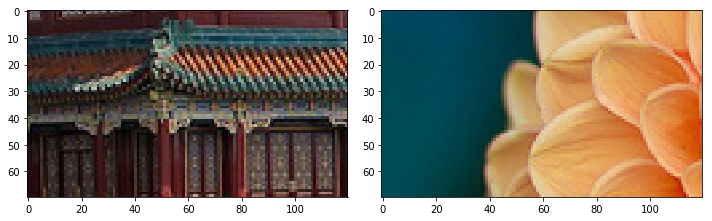

In [23]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(china)
plt.subplot(122)
plt.imshow(flower)
plt.tight_layout()
plt.show()

- the vertical and horizontal filter on example images

In [13]:
# Create 2 filters
filters = np.zeros(shape=(3, 3, channels, 2), dtype=np.float32)
filters[:, 1, :, 0] = 1  # vertical line
filters[1, :, :, 1] = 1  # horizontal line

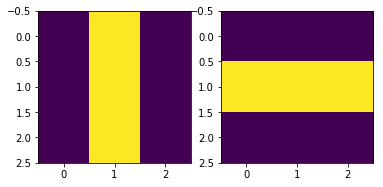

In [6]:
plt.subplot(121)
plt.imshow(filters[:, :, 0, 0])
plt.subplot(122)
plt.imshow(filters[:, :, 0, 1])
plt.show()

In [14]:
# We will want our image to be NCHW format for pytorch to process
images  = np.transpose(images, (0, 3, 1, 2)) # NHWC -> NCHW
filters = np.transpose(filters, (3, 2, 0, 1)) # HWCN -> NCHW

In [16]:
F.conv2d?

Docstring:
conv2d(input, weight, bias=None, stride=1, padding=0, dilation=1, groups=1) -> Tensor

Applies a 2D convolution over an input image composed of several input
planes.

See :class:`~torch.nn.Conv2d` for details and output shape.

.. include:: cudnn_deterministic.rst

Args:
    input: input tensor of shape :math:`(\text{minibatch} \times \text{in\_channels} \times iH \times iW)`
    weight: filters of shape :math:`(\text{out\_channels} \times \frac{\text{in\_channels}}{\text{groups}} \times kH \times kW)`
    bias: optional bias tensor of shape :math:`(\text{out\_channels})`. Default: ``None``
    stride: the stride of the convolving kernel. Can be a single number or a
      tuple `(sH, sW)`. Default: 1
    padding: implicit zero paddings on both sides of the input. Can be a
      single number or a tuple `(padH, padW)`. Default: 0
    dilation: the spacing between kernel elements. Can be a single number or
      a tuple `(dH, dW)`. Default: 1
    groups: split input into group

In [15]:
images_tensor  = torch.Tensor(images)
filters_tensor = torch.Tensor(filters)
outputs = F.conv2d(images_tensor, filters_tensor, )

In [17]:
china_convolved = outputs[0].numpy()
flower_convolved = outputs[1].numpy()

In [18]:
# CHW -> HWC
china_convolved = np.transpose(china_convolved, (1, 2, 0))
flower_convolved = np.transpose(flower_convolved, (1, 2, 0))

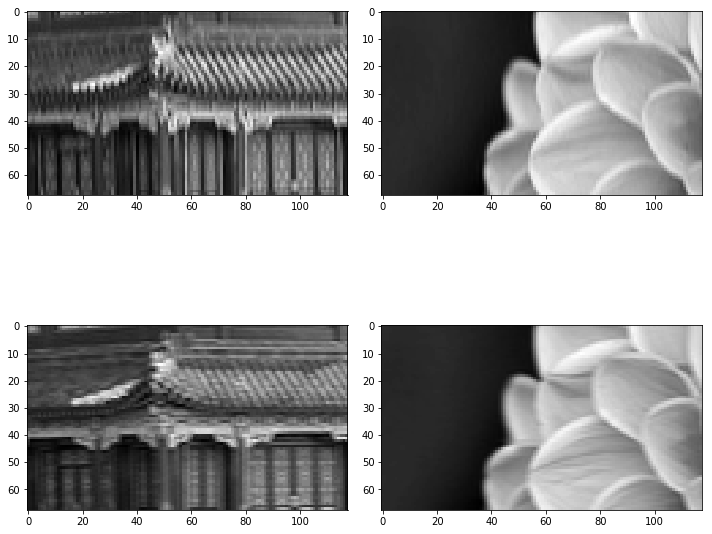

In [28]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(china_convolved[:, :, 0], cmap='gray')
plt.subplot(223)
plt.imshow(china_convolved[:, :, 1], cmap='gray')
plt.subplot(222)
plt.imshow(flower_convolved[:, :, 0], cmap='gray')
plt.subplot(224)
plt.imshow(flower_convolved[:, :, 1], cmap='gray')
plt.tight_layout()
plt.show()

- Smooth (Gaussian filter) or Emboss or Shapen Effect on example images

In [32]:
# Create 3 filters
filters2 = np.zeros(shape=(3, 3, channels, 3), dtype=np.float32)
# Smooth
filters2[0, 0, :, 0] = 0.0625
filters2[2, 0, :, 0] = 0.0625
filters2[0, 2, :, 0] = 0.0625
filters2[2, 2, :, 0] = 0.0625
filters2[0, 1, :, 0] = 0.125
filters2[1, 0, :, 0] = 0.125
filters2[1, 2, :, 0] = 0.125
filters2[2, 1, :, 0] = 0.125
filters2[1, 1, :, 0] = 0.25
# Emboss
filters2[0, 0, :, 1] = -2
filters2[2, 2, :, 1] = 2
filters2[0, 1, :, 1] = -1
filters2[1, 0, :, 1] = -1
filters2[1, 2, :, 1] = 1
filters2[2, 1, :, 1] = 1
filters2[1, 1, :, 1] = 1
# Sharpen
filters2[0, 1, :, 2] = -1
filters2[1, 0, :, 2] = -1
filters2[1, 2, :, 2] = -1
filters2[2, 1, :, 2] = -1
filters2[1, 1, :, 2] = 5

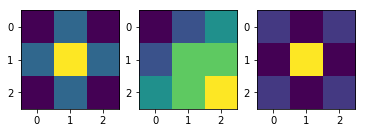

In [33]:
plt.subplot(131)
plt.imshow(filters2[:, :, 0, 0])
plt.subplot(132)
plt.imshow(filters2[:, :, 0, 1])
plt.subplot(133)
plt.imshow(filters2[:, :, 0, 2])
plt.show()

In [34]:
filters2 = np.transpose(filters2, (3, 2, 0, 1)) # HWCN -> NCHW
# comvert into Tensor
filters2_tensor = torch.Tensor(filters2)
outputs2 = F.conv2d(images_tensor, filters2_tensor, )

In [35]:
china_convolved2  = outputs2[0].numpy()
flower_convolved2 = outputs2[1].numpy()
# CHW -> HWC
china_convolved2  = np.transpose(china_convolved2, (1, 2, 0))
flower_convolved2 = np.transpose(flower_convolved2, (1, 2, 0))

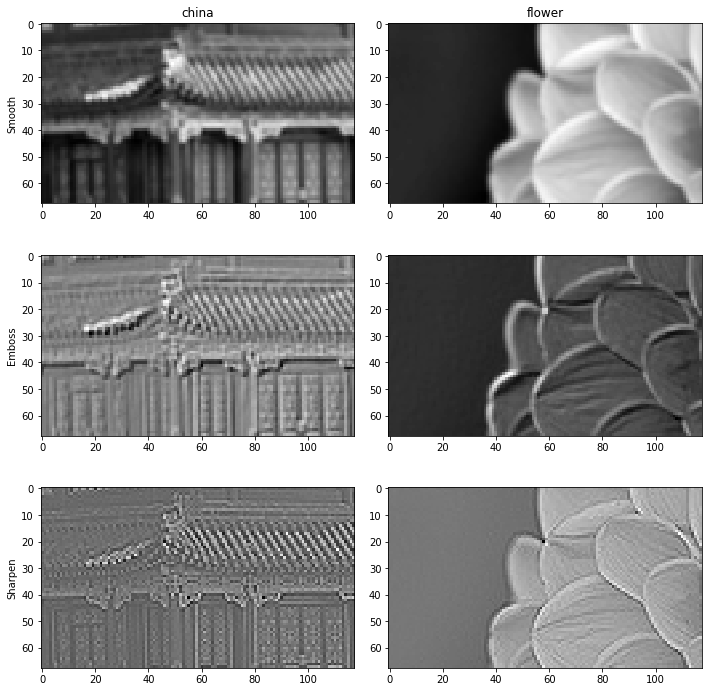

In [37]:
plt.figure(figsize=(10, 10))
plt.subplot(321)
plt.imshow(china_convolved2[:, :, 0], cmap='gray')
plt.title("china")
plt.ylabel("Smooth")
plt.subplot(323)
plt.imshow(china_convolved2[:, :, 1], cmap='gray')
plt.ylabel("Emboss")
plt.subplot(325)
plt.imshow(china_convolved2[:, :, 2], cmap='gray')
plt.ylabel("Sharpen")
plt.subplot(322)
plt.imshow(flower_convolved2[:, :, 0], cmap='gray')
plt.title("flower")
plt.subplot(324)
plt.imshow(flower_convolved2[:, :, 1], cmap='gray')
plt.subplot(326)
plt.imshow(flower_convolved2[:, :, 2], cmap='gray')
plt.tight_layout()
plt.show()

- Sobel for edge detection

> 一个离散的一阶差分算子，用来计算图像亮度函数的一阶梯度之近似值。在图像的任何一点使用此算子，将会产生该点对应的梯度矢量或是其法矢量。

In [41]:
# Create 4 filters
filters3 = np.zeros(shape=(3, 3, channels, 4), dtype=np.float32)
# Top
filters3[0, 0, :, 0] = 1
filters3[0, 1, :, 0] = 2
filters3[0, 2, :, 0] = 1
filters3[2, 0, :, 0] = -1
filters3[2, 1, :, 0] = -2
filters3[2, 2, :, 0] = -1
# Left
filters3[0, 0, :, 1] = 1
filters3[1, 0, :, 1] = 2
filters3[2, 0, :, 1] = 1
filters3[0, 2, :, 1] = -1
filters3[1, 2, :, 1] = -2
filters3[2, 2, :, 1] = -1
# Bottom
filters3[0, 0, :, 2] = -1
filters3[0, 1, :, 2] = -2
filters3[0, 2, :, 2] = -1
filters3[2, 0, :, 2] = 1
filters3[2, 1, :, 2] = 2
filters3[2, 2, :, 2] = 1
# Right
filters3[0, 0, :, 3] = -1
filters3[1, 0, :, 3] = -2
filters3[2, 0, :, 3] = -1
filters3[0, 2, :, 3] = 1
filters3[1, 2, :, 3] = 2
filters3[2, 2, :, 3] = 1

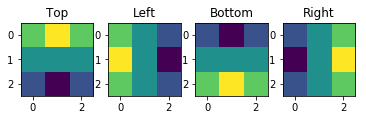

In [42]:
plt.subplot(141)
plt.imshow(filters3[:, :, 0, 0])
plt.title("Top")
plt.subplot(142)
plt.imshow(filters3[:, :, 0, 1])
plt.title("Left")
plt.subplot(143)
plt.imshow(filters3[:, :, 0, 2])
plt.title("Bottom")
plt.subplot(144)
plt.imshow(filters3[:, :, 0, 3])
plt.title("Right")
plt.show()

In [43]:
filters3 = np.transpose(filters3, (3, 2, 0, 1)) # HWCN -> NCHW
# comvert into Tensor
filters3_tensor = torch.Tensor(filters3)
outputs3 = F.conv2d(images_tensor, filters3_tensor, )

In [44]:
china_convolved3  = outputs3[0].numpy()
flower_convolved3 = outputs3[1].numpy()
# CHW -> HWC
china_convolved3  = np.transpose(china_convolved3, (1, 2, 0))
flower_convolved3 = np.transpose(flower_convolved3, (1, 2, 0))

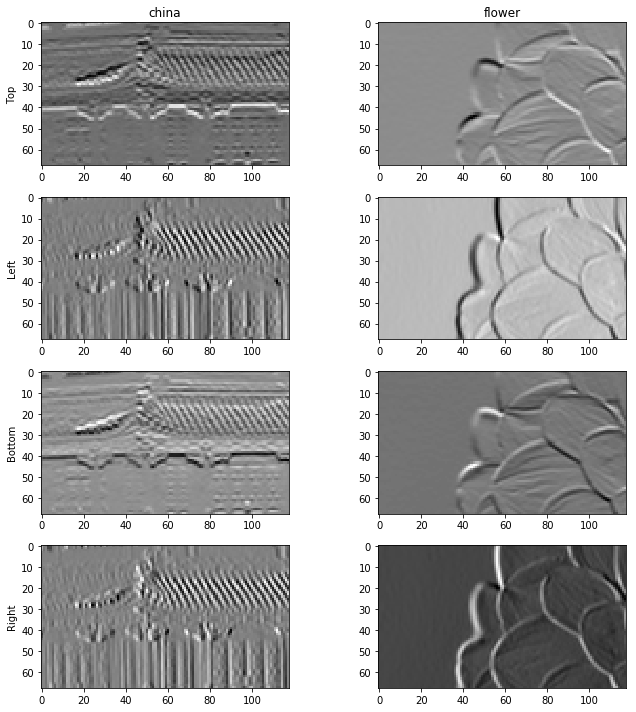

In [45]:
plt.figure(figsize=(10, 10))
plt.subplot(421)
plt.imshow(china_convolved3[:, :, 0], cmap='gray')
plt.title("china")
plt.ylabel("Top")
plt.subplot(423)
plt.imshow(china_convolved3[:, :, 1], cmap='gray')
plt.ylabel("Left")
plt.subplot(425)
plt.imshow(china_convolved3[:, :, 2], cmap='gray')
plt.ylabel("Bottom")
plt.subplot(427)
plt.imshow(china_convolved3[:, :, 3], cmap='gray')
plt.ylabel("Right")

plt.subplot(422)
plt.imshow(flower_convolved3[:, :, 0], cmap='gray')
plt.title("flower")
plt.subplot(424)
plt.imshow(flower_convolved3[:, :, 1], cmap='gray')
plt.subplot(426)
plt.imshow(flower_convolved3[:, :, 2], cmap='gray')
plt.subplot(428)
plt.imshow(flower_convolved3[:, :, 3], cmap='gray')
plt.tight_layout()
plt.show()

### 使用 OpenCV 进行实现多种滤波器 

To be continued

## Cifar10 classification 

### PyTorch Implementation 

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms

In [17]:
transforms.Normalize?

Init signature: transforms.Normalize(mean, std, inplace=False)
Docstring:     
Normalize a tensor image with mean and standard deviation.
Given mean: ``(M1,...,Mn)`` and std: ``(S1,..,Sn)`` for ``n`` channels, this transform
will normalize each channel of the input ``torch.*Tensor`` i.e.
``input[channel] = (input[channel] - mean[channel]) / std[channel]``

.. note::
    This transform acts out of place, i.e., it does not mutates the input tensor.

Args:
    mean (sequence): Sequence of means for each channel.
    std (sequence): Sequence of standard deviations for each channel.
File:           c:\users\hyj\anaconda3\envs\py37fastai10\lib\site-packages\torchvision\transforms\transforms.py
Type:           type
Subclasses:     


In [18]:
# 定义一个基础图像变换
# 由于torchvision的datasets的输出是[0,1]的PILImage
# 所以我们先先归一化为[-1,1]的Tensor
# 利用transforms模块中的Compose()
# 把ToTensor和Normalize这两个变换组合起来
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

`batch_size` 可以适当进行调整

In [19]:
# training set
trainset    = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
# testing set
testset     = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader  = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [8]:
# iter?
# 生成迭代器
# lst = [1, 2, 3]
# for i in iter(lst):
#     print(i)

In [9]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [53]:
label_show = labels.numpy()
images_show = images / 2 + 0.5
images_show = images_show.numpy()
print(type(images_show))
print(images_show.shape)

<class 'numpy.ndarray'>
(4, 3, 32, 32)


In [56]:
a = images_show[2,:,:,:]
images_show[2,:,:,:].shape

(3, 32, 32)

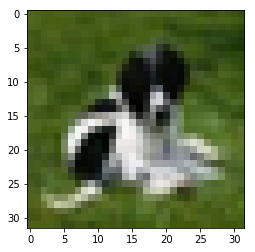

In [60]:
testttt = np.transpose(a, (1, 2, 0))
plt.imshow(testttt)
plt.show()

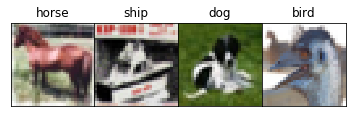

In [70]:
fig, axs = plt.subplots(1,4)
# 取消间距
fig.subplots_adjust(hspace = .5, wspace=.001)

for i in range(4):
    # PyTorch CWH -> WHC
    img = images_show[i,:,:,:]
    axs[i].imshow(np.transpose(img, (1, 2, 0)))
    # axs[i].title(classes[labels[i]])
    axs[i].set_title(classes[labels[i]])
    # 取消坐标轴
    axs[i].set_xticks([])
    axs[i].set_yticks([])

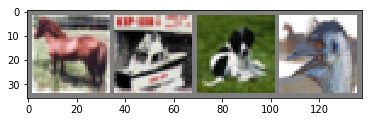

horse  ship   dog  bird


In [36]:
# 官方tutorial
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    # PyTorch CWH -> WHC
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [73]:
nn.Conv2d?

Init signature:
nn.Conv2d(
    in_channels,
    out_channels,
    kernel_size,
    stride=1,
    padding=0,
    dilation=1,
    groups=1,
    bias=True,
)
Docstring:     
Applies a 2D convolution over an input signal composed of several input
planes.

In the simplest case, the output value of the layer with input size
:math:`(N, C_{\text{in}}, H, W)` and output :math:`(N, C_{\text{out}}, H_{\text{out}}, W_{\text{out}})`
can be precisely described as:

.. math::
    \text{out}(N_i, C_{\text{out}_j}) = \text{bias}(C_{\text{out}_j}) +
    \sum_{k = 0}^{C_{\text{in}} - 1} \text{weight}(C_{\text{out}_j}, k) \star \text{input}(N_i, k)


where :math:`\star` is the valid 2D `cross-correlation`_ operator,
:math:`N` is a batch size, :math:`C` denotes a number of channels,
:math:`H` is a height of input planes in pixels, and :math:`W` is
width in pixels.

* :attr:`stride` controls the stride for the cross-correlation, a single
  number or a tuple.

* :attr:`padding` controls the amount of implici

In [98]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [95]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 输入通道3，输出通道6，核5
        # 32*32*3 可以替换成两个卷积核为3
        self.conv1 = nn.Conv2d(3, 6, 5)
        # 28*28*6
        self.pool = nn.MaxPool2d(2, 2)
        # 14*14*6
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 10*10*16
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 32*32*3 -> 28*28*6 -> 14*14*6
        x = self.pool(F.relu(self.conv1(x)))
        # 14*14*6 -> 10*10*16 -> 5*5*16
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# net = CNN()
net = CNN().to(device)

In [97]:
net

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

例子中的非线性激活函数用的并不是 `torch.nn` 模块中的这个部分，但是 `torch.nn` 模块中有这个部分

激活函数用的是 `torch.nn.functional` 模块中的函数

- `torch.nn` 与 `torch.nn.functional`的区别

torch.nn中大多数layer在torch.nn.funtional中都有一个与之对应的函数。二者的区别在于：

torch.nn.Module中实现layer的都是一个特殊的类，可以去查阅，他们都是以class xxxx来定义的，会自动提取可学习的参数。

而 `nn.functional` 中的函数，更像是纯函数，由 `def function( )` 定义，只是进行简单的数学运算而已，functional中的函数是一个确定的不变的运算公式，输入数据产生输出；

而深度学习中会有很多权重是在不断更新的，不可能每进行一次forward就用新的权重重新来定义一遍函数来进行计算，所以说就会采用类的方式，以确保能在参数发生变化时仍能使用我们之前定好的运算步骤。

如果模型有可学习的参数，最好使用nn.Module对应的相关layer，否则二者都可以使用，没有什么区别。
比如此例中的Relu其实没有可学习的参数，只是进行一个运算而已，所以使用的就是functional中的relu函数，

而卷积层和全连接层都有**可学习的参数**，所以用的是 `nn.Module` 中的类。
不具备可学习参数的层，将它们用函数代替，这样可以不用放在构造函数中进行初始化。

定义网络模型，主要会用到的就是torch.nn 和torch.nn.funtional这两个模块

In [96]:
import torch.optim as optim          #导入torch.potim模块
 
# 交叉熵损失函数
criterion = nn.CrossEntropyLoss()    
# optim模块中的SGD梯度优化方式---随机梯度下降
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

https://blog.csdn.net/teeyohuang/article/details/79219368

In [ ]:
start = time.time()
for _ in range(100000000):
    pass
end = time.time()
print("循环运行时间:%.2f秒"%(end-start))
#output:循环运行时间:5.50秒

In [99]:
import time
# from tqdm import tqdm_notebook

# for epoch in tqdm_notebook(range(5)):
for epoch in range(5):  # loop over the dataset multiple times
    
    start = time.time()

    running_loss = 0.0
    # enumerate是python的内置函数，既获得索引也获得数据
    for i, data in enumerate(trainloader, 0):
        
        # data是从enumerate返回的data，包含数据和标签信息，分别赋值给inputs和labels
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 要把梯度重新归零，因为反向传播过程中梯度会累加上一次循环的梯度
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # 使用交叉熵，计算损失值criterion
        loss = criterion(outputs, labels)
        # 反向传播
        loss.backward()
        # 当执行反向传播之后，把优化器的参数进行更新，以便进行下一轮
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
        end = time.time()
        print("循环运行时间:%.2f秒"%(end-start))

print('Finished Training')

[1,  2000] loss: 2.199
[1,  4000] loss: 1.910
[1,  6000] loss: 1.724
[1,  8000] loss: 1.609
[1, 10000] loss: 1.537
[1, 12000] loss: 1.469
[2,  2000] loss: 1.422
[2,  4000] loss: 1.367
[2,  6000] loss: 1.352
[2,  8000] loss: 1.343
[2, 10000] loss: 1.301
[2, 12000] loss: 1.279
[3,  2000] loss: 1.211
[3,  4000] loss: 1.213
[3,  6000] loss: 1.218
[3,  8000] loss: 1.207
[3, 10000] loss: 1.182
[3, 12000] loss: 1.200
[4,  2000] loss: 1.132
[4,  4000] loss: 1.105
[4,  6000] loss: 1.132
[4,  8000] loss: 1.109
[4, 10000] loss: 1.116
[4, 12000] loss: 1.118
[5,  2000] loss: 1.018
[5,  4000] loss: 1.049
[5,  6000] loss: 1.061
[5,  8000] loss: 1.053
[5, 10000] loss: 1.057
[5, 12000] loss: 1.062
Finished Training


In [100]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [104]:
# test
test_dataiter = iter(testloader)
test_images, test_labels = test_dataiter.next()
test_images = test_images.to(device)
test_labels = test_labels.to(device)

# print images
# imshow(torchvision.utils.make_grid(images))
# print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [105]:
net = CNN()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [86]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse  ship   dog plane


In [106]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 58 %


In [132]:
import pandas as pd

def accuracy(predicted,target):
    correct = 0
    #left = np.array(np.argmax(predicted,axis=0)).flatten()
    #right = np.argmax(target,axis=1)
    #confusion_mat = np.zeros((len(np.unique(target)),len(np.unique(predicted))))
    # 因为采用batch，所以 np.unique(target) 无法出现所有类别
    confusion_mat = np.zeros((10,10))
    for i in range(len(target)):
        if(predicted[i] == target[i]):
            correct+=1
        confusion_mat[target[i]][predicted[i]] =confusion_mat[target[i]][predicted[i]] +1
    return correct/len(target),pd.DataFrame(np.matrix(confusion_mat,dtype="int32"))

In [133]:
import pandas

# 增加confusion map
conf_mat = np.zeros((10,10))

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        
        # 增加confusion map
        _, map_old = accuracy(predicted.numpy(),labels.numpy())
        conf_mat = map_old + conf_mat
        
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1



for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 61 %
Accuracy of   car : 63 %
Accuracy of  bird : 55 %
Accuracy of   cat : 45 %
Accuracy of  deer : 44 %
Accuracy of   dog : 31 %
Accuracy of  frog : 81 %
Accuracy of horse : 69 %
Accuracy of  ship : 63 %
Accuracy of truck : 66 %


In [134]:
conf_mat

,0,1,2,3,4,5,6,7,8,9
0,612.0,24.0,96.0,28.0,62.0,9.0,31.0,36.0,50.0,52.0
1,64.0,632.0,16.0,15.0,18.0,4.0,26.0,20.0,49.0,156.0
2,48.0,4.0,559.0,93.0,89.0,36.0,118.0,37.0,9.0,7.0
3,14.0,5.0,101.0,454.0,84.0,88.0,159.0,72.0,11.0,12.0
4,13.0,4.0,160.0,82.0,445.0,21.0,183.0,79.0,9.0,4.0
5,8.0,1.0,93.0,324.0,64.0,313.0,81.0,104.0,9.0,3.0
6,2.0,4.0,64.0,56.0,21.0,16.0,810.0,11.0,11.0,5.0
7,8.0,1.0,43.0,85.0,95.0,33.0,24.0,698.0,3.0,10.0
8,153.0,33.0,27.0,32.0,19.0,11.0,12.0,22.0,639.0,52.0
9,34.0,44.0,15.0,69.0,17.0,9.0,47.0,51.0,46.0,668.0


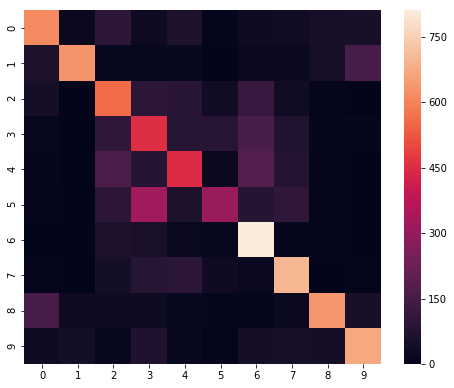

In [135]:
import seaborn as sns
from IPython.core.pylabtools import figsize # import figsize
figsize(8, 6.5) # 设置 figsize
ax = sns.heatmap(conf_mat)

### Fastai Implementation  

https://blog.csdn.net/qq_35654046/article/details/82252779 可以用在kaggle提供的比赛上

#### 官方教程 

https://www.kaggle.com/c/cifar-10/data

#### custom NN 

- https://github.com/radekosmulski/whale/blob/master/siamese_network_prototype.ipynb
- http://afitts.github.io/2018/12/03/humpback-siamese/

from [FastAI is too abstracted… how to create custom networks?](https://forums.fast.ai/t/fastai-is-too-abstracted-how-to-create-custom-networks/42040/3)

In [144]:
from fastai import *
from fastai.vision import *
from fastai.vision import learner
from fastai.callbacks.hooks import num_features_model, model_sizes

class SiameseNetwork(nn.Module):
    def __init__(self, arch=models.resnet18):
        super().__init__() 
        self.cnn = create_body(arch)
        self.head = nn.Linear(num_features_model(self.cnn), 1)
        
    def forward(self, im_A, im_B):
        # dl - distance layer
        x1, x2 = F.seq(im_A, im_B).map(self.cnn).map(self.process_features)
        dl = self.calculate_distance(x1, x2)
        out = self.head(dl)
        return out
    
    def process_features(self, x): return x.reshape(*x.shape[:2], -1).max(-1)[0]
    def calculate_distance(self, x1, x2): return (x1 - x2).abs_()

In [145]:
model = SiameseNet()

In [146]:
model

SiameseNet(
  (body): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (

## 参考链接 

- kernel visualization

1. http://setosa.io/ev/image-kernels/

- tqdm库

1. https://tqdm.github.io/docs/tqdm_notebook/
2. [好玩的Python库tqdm - CSDN](https://blog.csdn.net/zejianli/article/details/77915751)
3. https://stackoverflow.com/questions/57343134/jupyter-notebooks-not-displaying-progress-bars

第一次使用
`pip install ipywidgets`

```shell
conda install ipywidgets
jupyter nbextension enable --py widgetsnbextension
jupyter labextension install @jupyter-widgets/jupyterlab-manager
```

- PyTorch Cifar10

1. https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
2. https://github.com/kuangliu/pytorch-cifar
3. https://blog.csdn.net/teeyohuang/article/details/79211798

- matplotlib

1. python subplot within a loop: https://stackoverflow.com/questions/17210646/python-subplot-within-a-loop-first-panel-appears-in-wrong-position